In [246]:
# Importando dados

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

fat_df = pd.read_csv('../dados/fatores_performance_estudantil.csv')

fat_df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [247]:
# Investigando um pouco os dados

print(fat_df.info())
print()
print(fat_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

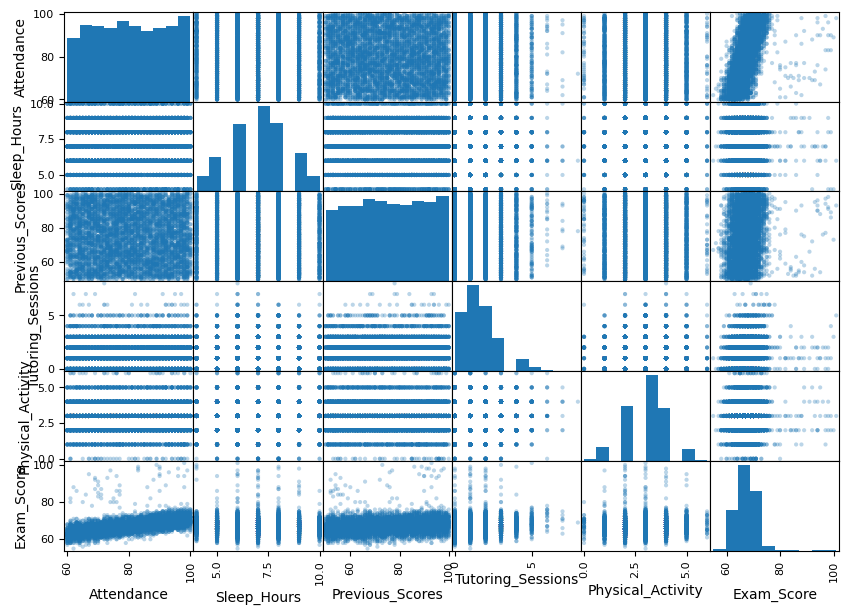

In [248]:
# Buscando uma correlação entre as informações numéricas em geral

from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

# Separando apenas os atributos numéricos
numericos = ['Attendance',
             'Sleep_Hours',
             'Previous_Scores',
             'Tutoring_Sessions',
             'Physical_Activity',
             'Exam_Score']

# Realizando uma correlação visual entre os dados numéricos
scatter_matrix(fat_df[numericos], figsize=(10,7), alpha=0.3)
plt.show()

In [249]:
# Verificando a correlação dos dados numéricos

corr_matrix = fat_df[numericos].corr()

corr_matrix['Exam_Score'].sort_values(ascending=False)

Exam_Score           1.000000
Attendance           0.581072
Previous_Scores      0.175079
Tutoring_Sessions    0.156525
Physical_Activity    0.027824
Sleep_Hours         -0.017022
Name: Exam_Score, dtype: float64

In [250]:
# Extraindo os valores categóricos para analisar

categoricos = ['Parental_Involvement', 
               'Access_to_Resources', 
               'Extracurricular_Activities', 
               'Motivation_Level', 
               'Internet_Access', 
               'Family_Income', 
               'Teacher_Quality', 
               'School_Type', 
               'Peer_Influence',
               'Learning_Disabilities',
               'Parental_Education_Level',
               'Distance_from_Home',
               'Gender']


fat_df_cat = fat_df[categoricos]

for i in list(fat_df_cat):
    print(fat_df_cat[i].value_counts(),'\n')

Parental_Involvement
Medium    3362
High      1908
Low       1337
Name: count, dtype: int64 

Access_to_Resources
Medium    3319
High      1975
Low       1313
Name: count, dtype: int64 

Extracurricular_Activities
Yes    3938
No     2669
Name: count, dtype: int64 

Motivation_Level
Medium    3351
Low       1937
High      1319
Name: count, dtype: int64 

Internet_Access
Yes    6108
No      499
Name: count, dtype: int64 

Family_Income
Low       2672
Medium    2666
High      1269
Name: count, dtype: int64 

Teacher_Quality
Medium    3925
High      1947
Low        657
Name: count, dtype: int64 

School_Type
Public     4598
Private    2009
Name: count, dtype: int64 

Peer_Influence
Positive    2638
Neutral     2592
Negative    1377
Name: count, dtype: int64 

Learning_Disabilities
No     5912
Yes     695
Name: count, dtype: int64 

Parental_Education_Level
High School     3223
College         1989
Postgraduate    1305
Name: count, dtype: int64 

Distance_from_Home
Near        3884
Moderate

In [251]:
# Os valores categóricos são aproximados em termos de coesão. Ordinal Encoder será utilizado.

from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()

# Transformando as colunas categóricas
transformado_fat = ordinal_encoder.fit_transform(fat_df_cat)

# Trazendo para dentro de um DataFrame a transformação para colocar dentro do DF original
fat_df_transformado = pd.DataFrame(transformado_fat, columns=categoricos)

# Aplicando so valores no DF original
for i in fat_df_transformado:
    for j in fat_df:
        if i == j:
            fat_df[j] = fat_df_transformado[i]

fat_df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,1.0,0.0,0.0,7,73,1.0,1.0,0,1.0,2.0,1.0,2.0,3,0.0,1.0,2.0,1.0,67
1,19,64,1.0,2.0,0.0,8,59,1.0,1.0,2,2.0,2.0,1.0,0.0,4,0.0,0.0,1.0,0.0,61
2,24,98,2.0,2.0,1.0,7,91,2.0,1.0,2,2.0,2.0,1.0,1.0,4,0.0,2.0,2.0,1.0,74
3,29,89,1.0,2.0,1.0,8,98,2.0,1.0,1,2.0,2.0,1.0,0.0,4,0.0,1.0,1.0,1.0,71
4,19,92,2.0,2.0,1.0,6,65,2.0,1.0,3,2.0,0.0,1.0,1.0,4,0.0,0.0,2.0,0.0,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,0.0,2.0,0.0,7,76,2.0,1.0,1,0.0,2.0,1.0,2.0,2,0.0,1.0,2.0,0.0,68
6603,23,76,0.0,2.0,0.0,8,81,2.0,1.0,3,1.0,0.0,1.0,2.0,2,0.0,1.0,2.0,0.0,69
6604,20,90,2.0,1.0,1.0,6,65,1.0,1.0,3,1.0,2.0,1.0,0.0,2,0.0,2.0,2.0,0.0,68
6605,10,86,0.0,0.0,1.0,6,91,0.0,1.0,2,1.0,2.0,0.0,2.0,3,0.0,1.0,0.0,0.0,68


In [252]:
# Analisando as categorias que foram transformadas em encoding

ordinal_encoder.categories_

[array(['High', 'Low', 'Medium'], dtype=object),
 array(['High', 'Low', 'Medium'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['High', 'Low', 'Medium'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['High', 'Low', 'Medium'], dtype=object),
 array(['High', 'Low', 'Medium', nan], dtype=object),
 array(['Private', 'Public'], dtype=object),
 array(['Negative', 'Neutral', 'Positive'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['College', 'High School', 'Postgraduate', nan], dtype=object),
 array(['Far', 'Moderate', 'Near', nan], dtype=object),
 array(['Female', 'Male'], dtype=object)]

In [253]:
print(fat_df['Distance_from_Home'].value_counts())
print(fat_df['Parental_Education_Level'].value_counts())

Distance_from_Home
2.0    3884
1.0    1998
0.0     658
Name: count, dtype: int64
Parental_Education_Level
1.0    3223
0.0    1989
2.0    1305
Name: count, dtype: int64


In [254]:
fat_df.isnull().sum().sort_values(ascending=False)

Parental_Education_Level      90
Teacher_Quality               78
Distance_from_Home            67
Hours_Studied                  0
Attendance                     0
Gender                         0
Learning_Disabilities          0
Physical_Activity              0
Peer_Influence                 0
School_Type                    0
Family_Income                  0
Tutoring_Sessions              0
Internet_Access                0
Motivation_Level               0
Previous_Scores                0
Sleep_Hours                    0
Extracurricular_Activities     0
Access_to_Resources            0
Parental_Involvement           0
Exam_Score                     0
dtype: int64

In [255]:
fat_df.fillna(value=2, inplace=True)

fat_df.isnull().sum().sort_values(ascending=False)

Hours_Studied                 0
Attendance                    0
Gender                        0
Distance_from_Home            0
Parental_Education_Level      0
Learning_Disabilities         0
Physical_Activity             0
Peer_Influence                0
School_Type                   0
Teacher_Quality               0
Family_Income                 0
Tutoring_Sessions             0
Internet_Access               0
Motivation_Level              0
Previous_Scores               0
Sleep_Hours                   0
Extracurricular_Activities    0
Access_to_Resources           0
Parental_Involvement          0
Exam_Score                    0
dtype: int64

### Iniciando o uso de Aprendizado de Máquina

A ideia inicial baseado na base de dados apresentada é utilizar regressores. Caso a precisão não seja aceitável, será realizada a categorização das notas e a base será reiniciada para uso de clasificadores.

In [256]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = fat_df.iloc[:,:-1]
y = fat_df.Exam_Score

# Não é possível utilizar o StratifiedShuffleSplit aqui. O target possui classes com apenas 1 exemplar
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

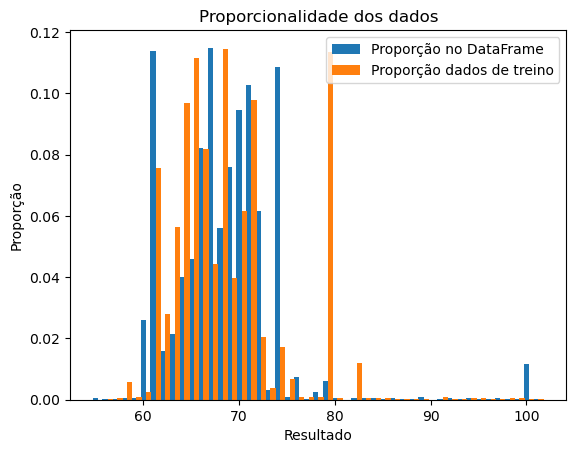

In [257]:
# Há um problema de proporcionalidade aqui que pode afetar os treinos

import matplotlib.pyplot as plt

# Plotando a proporção no DataFrame
# !!!!!! atenção: nessa linha eu realoco o valor da variável y que antes era Exam_Score !!!!!!
y = fat_df['Exam_Score'].value_counts()/len(fat_df)
x = fat_df['Exam_Score'].unique()
plt.bar(x, y, width=0.55, label='Proporção no DataFrame')

# Plotando a proporção nos dados de Treino
y1 = y_train.value_counts()/len(y_train)
x1 = y_train.unique()
plt.bar(x1+0.55, y1, width=0.55, label='Proporção dados de treino')

# Estilizando o gráfico
plt.title('Proporcionalidade dos dados')
plt.ylabel('Proporção')
plt.xlabel('Resultado')
plt.legend(loc='upper right')

Apesar da noção de que existe um problema de propocionalidade é extremamente importante mencionar que a diferença entre as proporções ficam entre 0.03 a 0.07. Apesar de compreender o impacto mínimo desse número, ele pode afetar o regressor que quero aplicar.

Ainda assim, prosseguirei na aplicação de um regressor nesse ponto para avaliar a sua eficácia.

Existe uma alta probabilidade de que o regressor não será capaz de prever as informações justamente por serem quantitavias e extremamente esparsas dentro dos dados. Para corrigir o problema um classificador será aplicado e uma transformação do target ocorrerá.

In [258]:
lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

LinearRegression()

In [259]:
y_pred = lin_reg.predict(X_test).round(0)

y_true = y_test.to_numpy()

In [260]:
# Como já era de se esperar, o resultado de precisão é terrível

from sklearn.metrics import precision_score

precision_score(y_true, y_pred, average='micro')

0.33434190620272314

### Voltando ao pré processamento dos dados
Nesse ponto é necessário fazer uma categorização das informações e trabalhar diretamente com classificadores

In [261]:
# Criando uma função de proporcionalidade

def proporcionalidade(dados, alvo, dados_treino):

    # Criando as informações que serão plotadas no gráfico_real
    y = dados[alvo].value_counts()/len(dados)
    x = dados[alvo].unique()

    # Criando as informações que serão plotadas no gráfico_treino
    y1 = dados_treino.value_counts()/len(dados_treino)
    x1 = dados_treino.unique()

    # Efetuando o plot ajustando para que os gráficos não se sobreponham
    grafico_real = plt.bar(x, y, width=0.55, label='Proporção no DataFrame')
    grafico_treino = plt.bar(x1+0.55, y1, width=0.55, label='Proporção dados de treino')

    # Estilizando o gráfico
    plt.title('Proporcionalidade dos dados')
    plt.ylabel('Proporção')
    plt.xlabel('Resultado')
    plt.legend(loc='upper right')

    # retorno das plotagens
    return grafico_real, grafico_treino

(<BarContainer object of 45 artists>, <BarContainer object of 44 artists>)

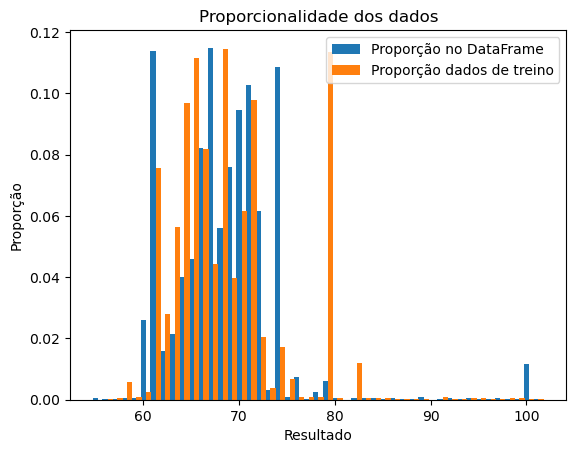

In [262]:
# Chamando um teste da função
proporcionalidade(fat_df, 'Exam_Score', y_train)

In [263]:
# Visualizando a correlação entre os dados atuais
corr_matrix = fat_df.corr()

corr_matrix['Exam_Score'].sort_values(ascending=False)

Exam_Score                    1.000000
Attendance                    0.581072
Hours_Studied                 0.445455
Previous_Scores               0.175079
Tutoring_Sessions             0.156525
Peer_Influence                0.100217
Distance_from_Home            0.088934
Extracurricular_Activities    0.064382
Internet_Access               0.051475
Parental_Education_Level      0.042961
Physical_Activity             0.027824
Gender                       -0.002032
School_Type                  -0.008844
Motivation_Level             -0.014910
Sleep_Hours                  -0.017022
Family_Income                -0.026484
Teacher_Quality              -0.060824
Learning_Disabilities        -0.085066
Access_to_Resources          -0.090503
Parental_Involvement         -0.094289
Name: Exam_Score, dtype: float64

In [264]:
# Criando uma nova coluna e inserindo ela em uma posição específica do DataFrame
fat_df.insert(1, 'Hours_Studied_per_Sleep_Hours', fat_df['Hours_Studied']/fat_df['Sleep_Hours'])

# Novamente trazendo a matriz de correlação
corr_matrix = fat_df.corr()

# Averiguando as correlações entre as notas e os outros dados
corr_matrix['Exam_Score'].sort_values(ascending=False)

Exam_Score                       1.000000
Attendance                       0.581072
Hours_Studied                    0.445455
Hours_Studied_per_Sleep_Hours    0.357899
Previous_Scores                  0.175079
Tutoring_Sessions                0.156525
Peer_Influence                   0.100217
Distance_from_Home               0.088934
Extracurricular_Activities       0.064382
Internet_Access                  0.051475
Parental_Education_Level         0.042961
Physical_Activity                0.027824
Gender                          -0.002032
School_Type                     -0.008844
Motivation_Level                -0.014910
Sleep_Hours                     -0.017022
Family_Income                   -0.026484
Teacher_Quality                 -0.060824
Learning_Disabilities           -0.085066
Access_to_Resources             -0.090503
Parental_Involvement            -0.094289
Name: Exam_Score, dtype: float64

In [265]:
# Eliminando as colunas repetidas que agora servem de cálculo para a nova coluna criada
fat_df.drop(columns=['Hours_Studied', 'Sleep_Hours'], inplace=True)

fat_df

,Hours_Studied_per_Sleep_Hours,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,3.285714,84,1.0,0.0,0.0,73,1.0,1.0,0,1.0,2.0,1.0,2.0,3,0.0,1.0,2.0,1.0,67
1,2.375000,64,1.0,2.0,0.0,59,1.0,1.0,2,2.0,2.0,1.0,0.0,4,0.0,0.0,1.0,0.0,61
2,3.428571,98,2.0,2.0,1.0,91,2.0,1.0,2,2.0,2.0,1.0,1.0,4,0.0,2.0,2.0,1.0,74
3,3.625000,89,1.0,2.0,1.0,98,2.0,1.0,1,2.0,2.0,1.0,0.0,4,0.0,1.0,1.0,1.0,71
4,3.166667,92,2.0,2.0,1.0,65,2.0,1.0,3,2.0,0.0,1.0,1.0,4,0.0,0.0,2.0,0.0,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,3.571429,69,0.0,2.0,0.0,76,2.0,1.0,1,0.0,2.0,1.0,2.0,2,0.0,1.0,2.0,0.0,68
6603,2.875000,76,0.0,2.0,0.0,81,2.0,1.0,3,1.0,0.0,1.0,2.0,2,0.0,1.0,2.0,0.0,69
6604,3.333333,90,2.0,1.0,1.0,65,1.0,1.0,3,1.0,2.0,1.0,0.0,2,0.0,2.0,2.0,0.0,68
6605,1.666667,86,0.0,0.0,1.0,91,0.0,1.0,2,1.0,2.0,0.0,2.0,3,0.0,1.0,0.0,0.0,68


In [266]:
bins = [0, 70, 80, 101]
labels = ['Ruim', 'Mediano', 'Excelente']

fat_df['Exam_Score'] = pd.cut(fat_df['Exam_Score'], bins=bins, labels=labels)

In [267]:
fat_df.Exam_Score.value_counts()

Exam_Score
Ruim         5524
Mediano      1040
Excelente      43
Name: count, dtype: int64

In [268]:
# Importando os classificadores
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC

# Passando os classificadores para as variáveis de manipulação
rfc = RandomForestClassifier()
sgdc = SGDClassifier(random_state=42)
svc = SVC(random_state=42)

# Realizando uma validação cruzada para verificar o resultado dos classificadores em acurácia
# 'precision_micro' utilizado pois existe grande discrepância na quantidade de cada classe
score_rfc = cross_val_score(rfc, fat_df.iloc[:,:-1], fat_df['Exam_Score'], scoring='precision_micro', cv=3)
score_sgdc = cross_val_score(sgdc, fat_df.iloc[:,:-1], fat_df['Exam_Score'], scoring='precision_micro', cv=3)
score_svc = cross_val_score(svc, fat_df.iloc[:,:-1], fat_df['Exam_Score'], scoring='precision_micro', cv=3)

In [269]:
# RandomForestClassifier possui as melhores classificações de precisão
print('Precisão Micro RFC: ', score_rfc)
print('Precisão Micro SGDC: ', score_sgdc)
print('Precisão Micro SVC: ', score_svc)

Precisão Micro RFC:  [0.90013618 0.89055404 0.90190736]
Precisão Micro SGDC:  [0.85201997 0.63533152 0.85785649]
Precisão Micro SVC:  [0.83613255 0.83605813 0.83605813]


In [270]:
X_train, X_test, y_train, y_test = train_test_split(X, fat_df.Exam_Score, test_size=0.3, random_state=42)

In [271]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [272]:
y_pred_rfc = rfc.predict(X_test)

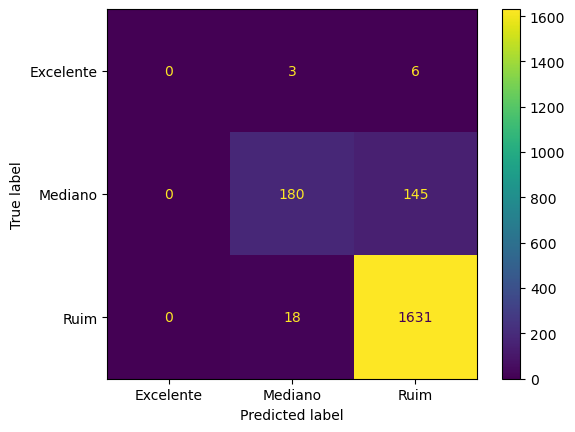

In [273]:
from sklearn.metrics import ConfusionMatrixDisplay, precision_score

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rfc)
plt.show()

In [274]:
# Ainda que a análise de precisão seja bem alta a classificação das classes está terrível
# Na Matriz de Confusão percebe-se que a classe 'mediano' está com uma precisão terrível
precision_score(y_true=y_test, y_pred=y_pred_rfc, average='micro')

0.9132627332324761

In [275]:
sgdc.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [276]:
y_pred_sgdc = sgdc.predict(X_test)

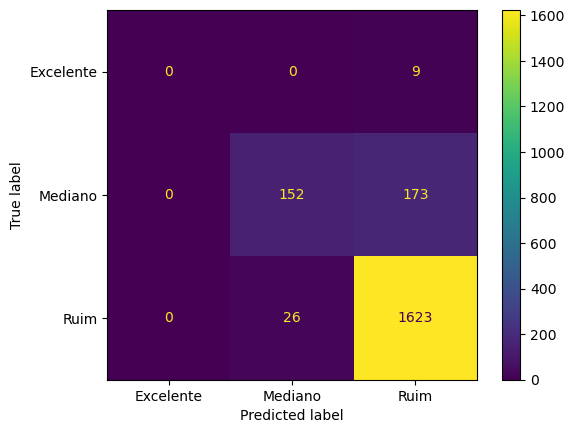

In [277]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_sgdc)
plt.show()

Claramente a presença exacerbada de uma grande quantidade de uma mesma classe está afetando a capacidade de classificação dos classificadores. Para tentar resolver esse problema, vou tentar criar um set grid de hiper parâmetros.

In [ ]:
from sklearn.model_selection import GridSearchCV